<a href="https://colab.research.google.com/github/shanikawm/other/blob/main/2022-07-18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Required Python Libaries

In [ ]:
pip install 'matplotlib==3.5.2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Set Preparation
The data set ‘Selected Cancers 2011, 2012 & 2013’ is available on the web page https://catalogue.data.govt.nz/dataset/selected-cancers-20112012-2013/resource/d8f81832-c488-47e6-93fc-81d298edfd40 in Excel format.

URL: https://www.health.govt.nz/system/files/documents/publications/selected-cancers-2011-2013v2.xlsx

We'll try to load that excel file into a Python Panada data frame from the URL itself
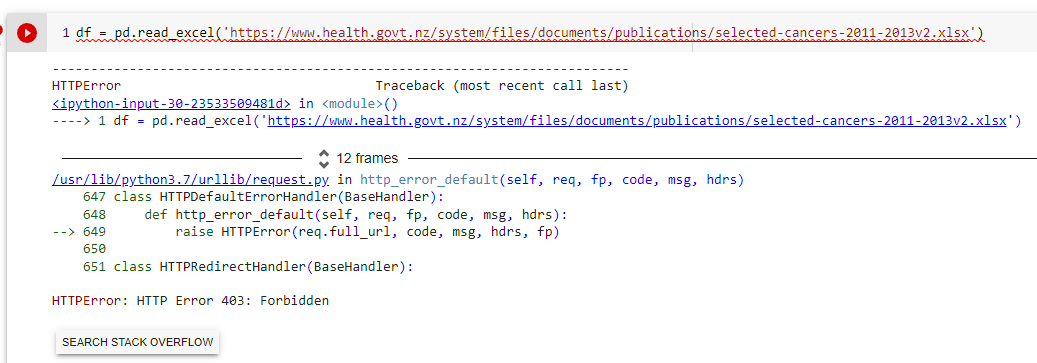

That doesn't work. So we'll download it using the Unix wget command.

In [ ]:
!wget https://www.health.govt.nz/system/files/documents/publications/selected-cancers-2011-2013v2.xlsx

--2022-07-17 05:44:38--  https://www.health.govt.nz/system/files/documents/publications/selected-cancers-2011-2013v2.xlsx
Resolving www.health.govt.nz (www.health.govt.nz)... 104.17.16.99, 104.17.15.99, 2606:4700::6811:f63, ...
Connecting to www.health.govt.nz (www.health.govt.nz)|104.17.16.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151695 (148K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘selected-cancers-2011-2013v2.xlsx’

selected-cancers-20 100%[===================>] 148.14K   343KB/s    in 0.4s    

2022-07-17 05:44:40 (343 KB/s) - ‘selected-cancers-2011-2013v2.xlsx’ saved [151695/151695]



The file was successfully downloaded, and now we'll try to load it to a pandas data frame. 

In [ ]:
df = pd.read_excel('selected-cancers-2011-2013v2.xlsx')
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,Title:,"Selected cancers 2011, 2012, 2013",NaN,NaN
6,NaN,NaN,NaN,NaN
7,Summary:,These tables contain summarised cancer registr...,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


The file can successfully be loaded to a pandas data frame, and the first sheet has been read by default. 

### Question 1
**What was the most common form of cancer in 2013 for New Zealand, based on this data source?**

By visually analyzing the Excel file, the data table relevant to this question can be found in sheet '2013_Registrations'  rows 5-25 and columns A-U. We'll use pandas read_excel function parameters 'sheet_name', 'usecols', 'skiprows' and 'nrows' to load this data to a Pandas data frame. 

In [ ]:
df_2013 = pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2013_Registrations', usecols='A:U', skiprows=4, nrows=24, header=0)
df_2013.head()

,Cancer (ICD Code)\n,Unnamed: 1,0–4,5–9,10–14,15–19,20–24,25–29,30–34,35–39,...,45–49,50–54,55–59,60–64,65–69,70–74,75–79,80–84,85+,Total
0,Cervix (C53),Female,0,0,0,0,5,23,17,18,...,13,9,16,10,8,8,5,5,7,164
1,Colorectum (C18–C21),Total,0,0,0,1,6,6,25,29,...,85,141,221,301,408,481,513,429,367,3066
2,NaN,Male,0,0,0,1,1,5,11,15,...,40,73,122,175,253,273,262,211,161,1624
3,NaN,Female,0,0,0,0,5,1,14,14,...,45,68,99,126,155,208,251,218,206,1442
4,Female Breast (C50),Female,0,0,0,1,2,11,41,101,...,387,391,394,402,352,212,191,182,153,3007


In the first column, some merged rows should have the same cancer name for non-gender-specific cancer types. We'll use Pandas 'fillna' forward fill function to fill those cells. 

In [ ]:
df_2013.fillna(method='ffill', inplace=True)
df_2013

,Cancer (ICD Code)\n,Unnamed: 1,0–4,5–9,10–14,15–19,20–24,25–29,30–34,35–39,...,45–49,50–54,55–59,60–64,65–69,70–74,75–79,80–84,85+,Total
0,Cervix (C53),Female,0,0,0,0,5,23,17,18,...,13,9,16,10,8,8,5,5,7,164
1,Colorectum (C18–C21),Total,0,0,0,1,6,6,25,29,...,85,141,221,301,408,481,513,429,367,3066
2,Colorectum (C18–C21),Male,0,0,0,1,1,5,11,15,...,40,73,122,175,253,273,262,211,161,1624
3,Colorectum (C18–C21),Female,0,0,0,0,5,1,14,14,...,45,68,99,126,155,208,251,218,206,1442
4,Female Breast (C50),Female,0,0,0,1,2,11,41,101,...,387,391,394,402,352,212,191,182,153,3007
5,Leukaemia (C91–C95),Total,27,9,10,6,11,7,11,11,...,22,36,55,69,65,90,67,59,66,638
6,Leukaemia (C91–C95),Male,13,8,9,6,8,5,6,7,...,12,20,35,38,46,50,45,34,40,391
7,Leukaemia (C91–C95),Female,14,1,1,0,3,2,5,4,...,10,16,20,31,19,40,22,25,26,247
8,Melanoma (C43),Total,0,0,0,7,14,30,49,90,...,145,229,204,300,268,289,223,205,195,2359
9,Melanoma (C43),Male,0,0,0,3,5,9,17,26,...,73,106,107,159,156,175,123,120,111,1221


In [ ]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cancer (ICD Code)
  24 non-null     object
 1   Unnamed: 1          24 non-null     object
 2   0–4                 24 non-null     int64 
 3   5–9                 24 non-null     int64 
 4   10–14               24 non-null     int64 
 5   15–19               24 non-null     int64 
 6   20–24               24 non-null     int64 
 7   25–29               24 non-null     int64 
 8   30–34               24 non-null     int64 
 9   35–39               24 non-null     int64 
 10  40–44               24 non-null     int64 
 11  45–49               24 non-null     int64 
 12  50–54               24 non-null     int64 
 13  55–59               24 non-null     int64 
 14  60–64               24 non-null     int64 
 15  65–69               24 non-null     int64 
 16  70–74               24 non-n

Now we have a perfect Pandas data frame. Let's find our answer to the question by finding the max value of the last column, 'Total'. 

In [ ]:
df_2013.loc[df_2013['Total'].idxmax()]

Cancer (ICD Code)\n    Prostate (C61)
Unnamed: 1                       Male
0–4                                 0
5–9                                 0
10–14                               0
15–19                               0
20–24                               0
25–29                               0
30–34                               0
35–39                               2
40–44                              11
45–49                              54
50–54                             165
55–59                             356
60–64                             562
65–69                             791
70–74                             522
75–79                             300
80–84                             206
85+                               167
Total                            3136
Name: 11, dtype: object

The answer is **Prostate (C61)**. But it is only for Male. Let's see what is non-gender-specific cancer by filtering the second column with the value 'Total' because there is a 'Total' value for non-gender-specific cancer types.

In [ ]:
df_2013.loc[df_2013[df_2013['Unnamed: 1'] == 'Total']['Total'].idxmax()]

Cancer (ICD Code)\n    Colorectum (C18–C21)
Unnamed: 1                            Total
0–4                                       0
5–9                                       0
10–14                                     0
15–19                                     1
20–24                                     6
25–29                                     6
30–34                                    25
35–39                                    29
40–44                                    53
45–49                                    85
50–54                                   141
55–59                                   221
60–64                                   301
65–69                                   408
70–74                                   481
75–79                                   513
80–84                                   429
85+                                     367
Total                                  3066
Name: 1, dtype: object

The answer is **Colorectum (C18–C21)**

### Question 2
**How did the prevalence for this type of cancer change over 2011, 2012, 2013? Please provide a visual output and provide commentary**

We will also load 2011 and 2012 data in the same manner as pandas data frames. 

In [ ]:
df_2012 = pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2012_Registrations', usecols='A:U', skiprows=4, nrows=24, header=0)
df_2012.fillna(method='ffill', inplace=True)
df_2012.head()

,Cancer (ICD Code)\n,Unnamed: 1,0–4,5–9,10–14,15–19,20–24,25–29,30–34,35–39,...,45–49,50–54,55–59,60–64,65–69,70–74,75–79,80–84,85+,Total
0,Cervix (C53),Female,0,0,0,0,5,7,15,19,...,17,17,15,15,9,4,5,7,5,166
1,Colorectum (C18–C21),Total,0,0,0,0,1,7,25,39,...,86,161,198,304,421,516,432,409,371,3023
2,Colorectum (C18–C21),Male,0,0,0,0,1,5,12,21,...,44,76,113,173,249,291,225,195,151,1574
3,Colorectum (C18–C21),Female,0,0,0,0,0,2,13,18,...,42,85,85,131,172,225,207,214,220,1449
4,Female Breast (C50),Female,0,0,0,0,1,12,47,87,...,427,385,328,409,385,219,213,142,143,3019


In [ ]:
df_2011 = pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2011_Registrations', usecols='A:U', skiprows=4, nrows=24, header=0)
df_2011.fillna(method='ffill', inplace=True)
df_2011.head()

,Cancer (ICD Code)\n,Unnamed: 1,0–4,5–9,10–14,15–19,20–24,25–29,30–34,35–39,...,45–49,50–54,55–59,60–64,65–69,70–74,75–79,80–84,85+,Total
0,Cervix (C53),Female,0,0,0,0,7,13,26,16,...,18,8,21,7,10,8,4,5,5,165
1,Colorectum (C18–C21),Total,0,0,0,1,2,10,20,16,...,87,141,202,305,413,502,498,410,368,3030
2,Colorectum (C18–C21),Male,0,0,0,1,1,4,13,8,...,43,76,112,183,251,288,289,204,139,1635
3,Colorectum (C18–C21),Female,0,0,0,0,1,6,7,8,...,44,65,90,122,162,214,209,206,229,1395
4,Female Breast (C50),Female,0,0,0,0,1,7,36,95,...,387,379,362,394,329,187,157,160,179,2867


In [ ]:
df_2013[(df_2013['Unnamed: 1'] == 'Total') & (df_2013['Cancer (ICD Code)\n'] == 'Colorectum (C18–C21)')]['Total']

1    3066
Name: Total, dtype: int64

In [ ]:
df_2013[df_2013['Cancer (ICD Code)\n'] == 'Prostate (C61)']['Total'].values[0]

3136

Let's create a bar plot for this to analyse (https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html) 

In [ ]:
labels = ['2011', '2012', '2013']
colorectom = [df_2011[(df_2011['Unnamed: 1'] == 'Total') & (df_2011['Cancer (ICD Code)\n'] == 'Colorectum (C18–C21)')]['Total'].values[0], \
              df_2012[(df_2012['Unnamed: 1'] == 'Total') & (df_2012['Cancer (ICD Code)\n'] == 'Colorectum (C18–C21)')]['Total'].values[0], \
              df_2013[(df_2013['Unnamed: 1'] == 'Total') & (df_2013['Cancer (ICD Code)\n'] == 'Colorectum (C18–C21)')]['Total'].values[0]]
prostate = [df_2011[df_2011['Cancer (ICD Code)\n'] == 'Prostate (C61)']['Total'].values[0], \
            df_2012[df_2012['Cancer (ICD Code)\n'] == 'Prostate (C61)']['Total'].values[0], \
            df_2013[df_2013['Cancer (ICD Code)\n'] == 'Prostate (C61)']['Total'].values[0]]

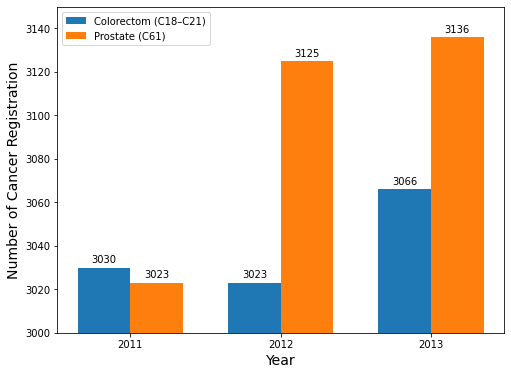

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, colorectom, width, label='Colorectom (C18–C21)')
rects2 = ax.bar(x + width/2, prostate, width, label='Prostate (C61)')
ax.set_ylabel('Number of Cancer Registration', size=14)
ax.set_xlabel('Year', size=14)
ax.set_xticks(x, labels)
#ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.ylim([3000,3150])
plt.show()

Male **Prostate (C61)** cancers have increased over the years, and non-gender specific cancer **Colorectom (C18–C21)** dropped in 2012 but again increased in 2013.

### Question 3
**What further information can you provide on the prevalence of this form of cancer in New Zealand today?**

Data for 2014 to 2017 is available in the Open Data Catalog. Let's manually add them and recreate the bar graphs. 

In [ ]:
labels=labels +['2014','2015','2016','2017']
colorectom=colorectom+[3294, 3157, 3219, 3081]
prostate = prostate + [3160, 3103, 3394, 3834]

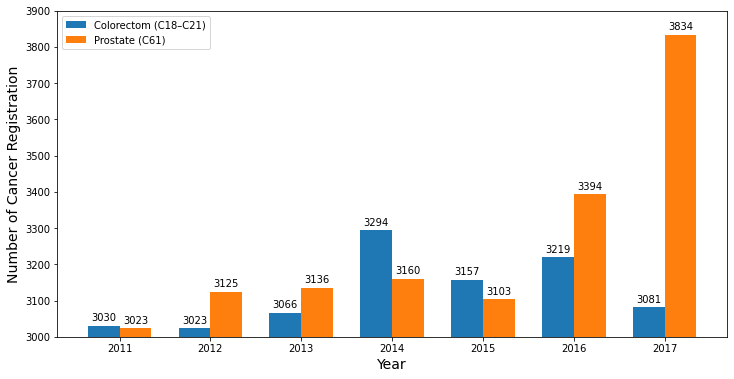

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, colorectom, width, label='Colorectom (C18–C21)')
rects2 = ax.bar(x + width/2, prostate, width, label='Prostate (C61)')
ax.set_ylabel('Number of Cancer Registration', size=14)
ax.set_xlabel('Year', size=14)
ax.set_xticks(x, labels)
#ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.ylim([3000,3900])
plt.show()

There is a considerable increase in Prostate cancer registration. As per the website https://pubmed.ncbi.nlm.nih.gov/34855736/, it was **5,858** for the year 2021. 

### Question 4
**What is the relationship between age and female breast cancer in New Zealand in 2012?**

We will filter relevant details to a separate Pandas data frame. 

In [ ]:
C50_2012=df_2012[df_2012['Cancer (ICD Code)\n'] == 'Female Breast (C50)'].iloc[:,2:20].reset_index(drop=True).T

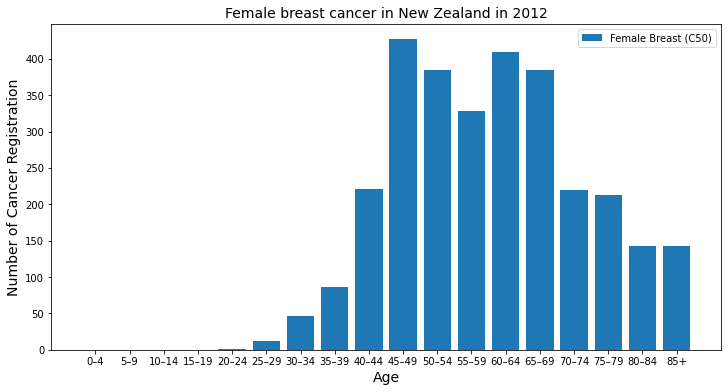

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar( C50_2012.index.values,C50_2012.iloc[:, 0].values, label='Female Breast (C50)')
ax.set_title("Female breast cancer in New Zealand in 2012",size=14)
ax.set_ylabel('Number of Cancer Registration', size=14)
ax.set_xlabel('Age', size=14)
ax.legend()
plt.show()

It can be observed that the risk of breast cancer starts from age 20 and increases up to age 50. From age 50-70 have the same risk, and some drop after age 70. 

### Question 5
**What forms of cancer impact Māori more than non-Māori? Please provide comments on why you think this is**

We will extract the cancer details from the Excel sheets for Maori and non-Maori.  Then we will get some of all the cancers for 2011 to 2013. 

In [ ]:
M_2011=pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2011_Registrations', usecols='A:U', skiprows=36, nrows=24, header=0)
Maori=M_2011[['Cancer (ICD Code)\n','Total']]

In [ ]:
M_2012=pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2012_Registrations', usecols='A:U', skiprows=36, nrows=24, header=0)
Maori['Total']=Maori['Total']+M_2012['Total']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
M_2013=pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2013_Registrations', usecols='A:U', skiprows=36, nrows=24, header=0)
Maori['Total']=Maori['Total']+M_2013['Total']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Maori=Maori.dropna().reset_index(drop=True) #We will drop the rows with NaN values for the Cancer name so that the record only with the total will remain

In [ ]:
Maori.rename(columns={'Total':'Maori'}, inplace=True) #Rename

In [ ]:
Maori

,Cancer (ICD Code)\n,Maori
0,Cervix (C53),114
1,Colorectum (C18–C21),480
2,Female Breast (C50),1081
3,Leukaemia (C91–C95),209
4,Melanoma (C43),108
5,Prostate (C61),552
6,Lung (C33–C34),1206
7,Hodgkin Lymphoma (C81),33
8,"Non-Hodgkin Lymphoma (C82–C85,C96)",165
9,Chronic myoproliferative disorders and myelody...,76


In [ ]:
NM_2011=pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2011_Registrations', usecols='A:U', skiprows=68, nrows=24, header=0)
NonMaori=NM_2011[['Cancer (ICD Code)\n','Total']]

In [ ]:
NM_2012=pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2012_Registrations', usecols='A:U', skiprows=68, nrows=24, header=0)
NonMaori['Total']=NonMaori['Total']+NM_2012['Total']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
NM_2013=pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2013_Registrations', usecols='A:U', skiprows=68, nrows=24, header=0)
NonMaori['Total']=NonMaori['Total']+NM_2013['Total']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
NonMaori=NonMaori.dropna().reset_index(drop=True)  #We will drop the rows with NaN values for the Cancer name so that the record only with the total will remain

In [ ]:
NonMaori.rename(columns={'Total':'Non-Maori'}, inplace=True)

In [ ]:
NonMaori

,Cancer (ICD Code)\n,Non-Maori
0,Cervix (C53),381
1,Colorectum (C18–C21),8639
2,Female Breast (C50),7812
3,Leukaemia (C91–C95),1589
4,Melanoma (C43),6780
5,Prostate (C61),8732
6,Lung (C33–C34),4820
7,Hodgkin Lymphoma (C81),274
8,"Non-Hodgkin Lymphoma (C82–C85,C96)",2088
9,Chronic myoproliferative disorders and myelody...,831


Let's see the difference between Maori and Non-Maori

In [ ]:
enthnic=Maori.copy()

In [ ]:
enthnic['Non-Maori']=NonMaori['Non-Maori']

In [ ]:
enthnic

,Cancer (ICD Code)\n,Maori,Non-Maori
0,Cervix (C53),114,381
1,Colorectum (C18–C21),480,8639
2,Female Breast (C50),1081,7812
3,Leukaemia (C91–C95),209,1589
4,Melanoma (C43),108,6780
5,Prostate (C61),552,8732
6,Lung (C33–C34),1206,4820
7,Hodgkin Lymphoma (C81),33,274
8,"Non-Hodgkin Lymphoma (C82–C85,C96)",165,2088
9,Chronic myoproliferative disorders and myelody...,76,831


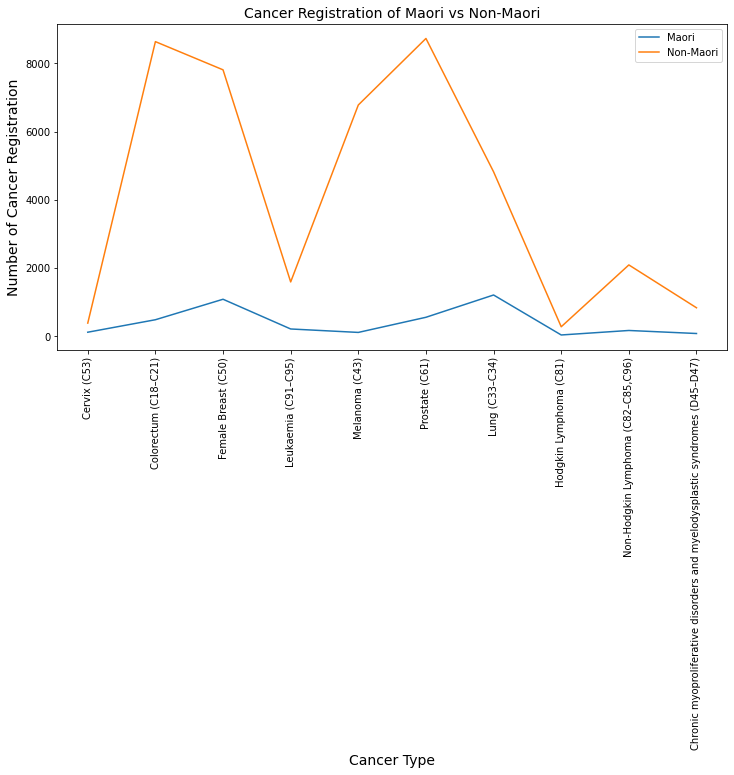

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(enthnic.iloc[:, 1].values, label='Maori')
ax.plot(enthnic.iloc[:, 2].values, label='Non-Maori')
ax.set_title("Cancer Registration of Maori vs Non-Maori",size=14)
ax.set_ylabel('Number of Cancer Registration', size=14)
ax.set_xlabel('Cancer Type', size=14)
plt.xticks(range(0,len(enthnic.index)),enthnic.iloc[:, 0].values, rotation=90)
ax.legend()
plt.show()

In New Zealand Maori to Non-Maori population ratio is around 17% to 83%. Hence cancer registration is high for non-Maori people. But according to the pattern, female breast and lung cancers are higher among Maori people than non-Maori people.

### Question 6
**Based on your answer to number five, what advice would you give to policy makers to reduce the ethnic inequity of cancer prevalence in New Zealand?**

Policymakers should increase awareness of breast and lung cancers and early detection programs among the Maori. Also, it is necessary to study the lifestyle of Maori people to check whether there is a connection between lifestyle and cancers.  

### Question 7
**What can you say about the prevalence of childhood cancer in New Zealand?**

Let's quickly load data to data frame for the age from 0 to 14

In [ ]:
child_2013 = pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2013_Registrations', usecols='A:E', skiprows=4, nrows=24, header=0)
child_2013 = child_2013.dropna().reset_index(drop=True)
child_2012 = pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2012_Registrations', usecols='A:E', skiprows=4, nrows=24, header=0)
child_2012 = child_2012.dropna().reset_index(drop=True)
child_2011 = pd.read_excel('selected-cancers-2011-2013v2.xlsx', sheet_name='2011_Registrations', usecols='A:E', skiprows=4, nrows=24, header=0)
child_2011 = child_2011.dropna().reset_index(drop=True)

In [ ]:
children=child_2011.copy()
children['0–4']=children['0–4']+child_2012['0–4']+child_2013['0–4']
children['5–9']=children['5–9']+child_2012['5–9']+child_2013['5–9']
children['10–14']=children['10–14']+child_2012['10–14']+child_2013['10–14']

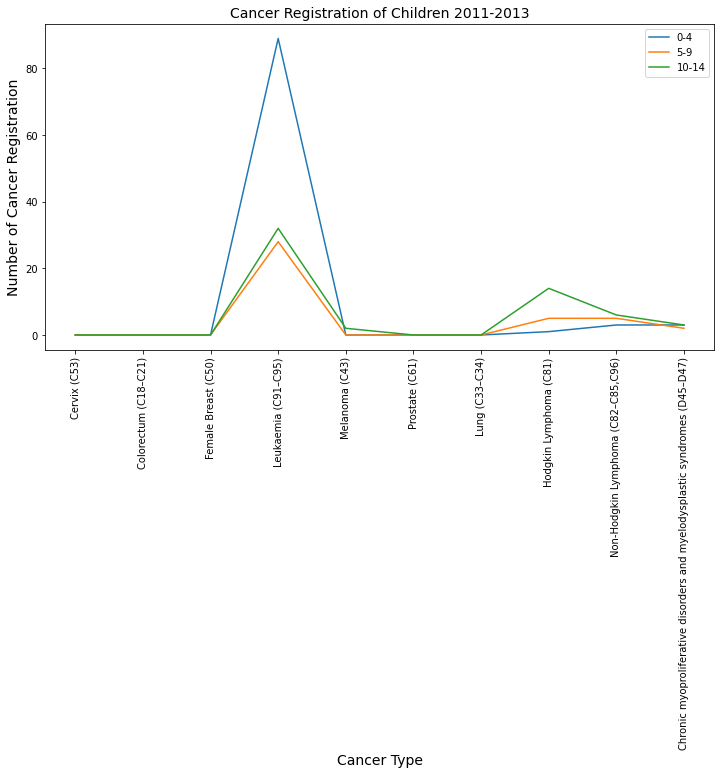

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(children.iloc[:, 2].values, label='0-4')
ax.plot(children.iloc[:, 3].values, label='5-9')
ax.plot(children.iloc[:, 4].values, label='10-14')
ax.set_title("Cancer Registration of Children 2011-2013",size=14)
ax.set_ylabel('Number of Cancer Registration', size=14)
ax.set_xlabel('Cancer Type', size=14)
plt.xticks(range(0,len(children.index)),children.iloc[:, 0].values, rotation=90)
ax.legend()
plt.show()

From the above chart, it can easily be observed that Leukaemia is the most common cancer for children while having some Lymphoma and Chronic myoproliferative disorders and myelodysplastic syndromes cancers.  

### Question 8
**Any other comments?**

There are many other online resources that explain cancer stats in New Zealand with comprehensive details. https://gco.iarc.fr/ has some interesting stats in the report https://gco.iarc.fr/today/data/factsheets/populations/554-new-zealand-fact-sheets.pdf. 

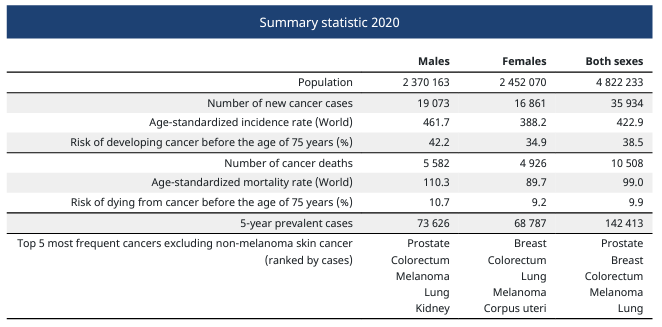

